In [178]:
import bokeh.plotting as bpl
import logging
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import sys
import os
from glob import glob
import h5py    
try:
    cv2.setNumThreads(0)
except():
    pass

try:
    if __IPYTHON__:
        get_ipython().magic('load_ext autoreload')
        get_ipython().magic('autoreload 2')
except NameError:
    pass

logging.basicConfig(format=
                          "%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s",
                    # filename="/tmp/caiman.log",
                    level=logging.WARNING)

import pickle
from caiman.base.rois import register_multisession
from caiman.base.rois import register_ROIs
from caiman.utils import visualization
from caiman.utils.utils import download_demo
import caiman as cm
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params



from matplotlib import pyplot as plt
import numpy as np
import imageio
from caiman_analysis import load_as_obj



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
#get the hdf5 file and from that extract the estimates.A caiman output. It's important to use the load_as_obj function because caiman saves it in a weird way
file_name1 = 'F://Experiments//EMX-Cre_CaMK2-tTA_tetO-GCaMP_Chrome virus//20200316//MBOC5_399//20200316//ori//out//caiman_data_0000.hdf5'
cm1 = load_as_obj(file_name1)

#get the template image used to seed the session
template_file = 'F://Experiments//EMX-Cre_CaMK2-tTA_tetO-GCaMP_Chrome virus//20200316//MBOC5_399//'
template1 = imageio.imread(template_file + 'caiman_template.png')
dims = template.shape
dims

(512, 400)

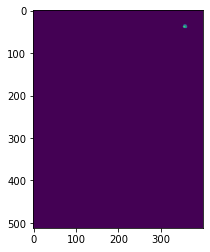

In [184]:
#verify that the estimates.A is fine and has the right shape by plotting one cell
plt.figure()
plt.imshow(np.reshape(cm1.estimates.A[:,0].toarray(), dims, order='F'))

In [185]:
#get the hdf5 file and from that extract the estimates.A caiman output
file_name2 = 'F://Experiments//EMX-Cre_CaMK2-tTA_tetO-GCaMP_Chrome virus//20200316//MBOC5_399//20200316//ori//out//caiman_data_0001.hdf5'
cm2 = load_as_obj(file_name2)
#get the template image used to seed the session

template_file = 'F://Experiments//EMX-Cre_CaMK2-tTA_tetO-GCaMP_Chrome virus//20200316//MBOC5_399//'
template2 = imageio.imread(template_file + 'caiman_template.png')
dims = template.shape
dims

(512, 400)

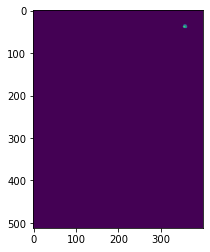

In [186]:
plt.figure()
plt.imshow(np.reshape(cm1.estimates.A[:,0].toarray(), dims, order='F'))

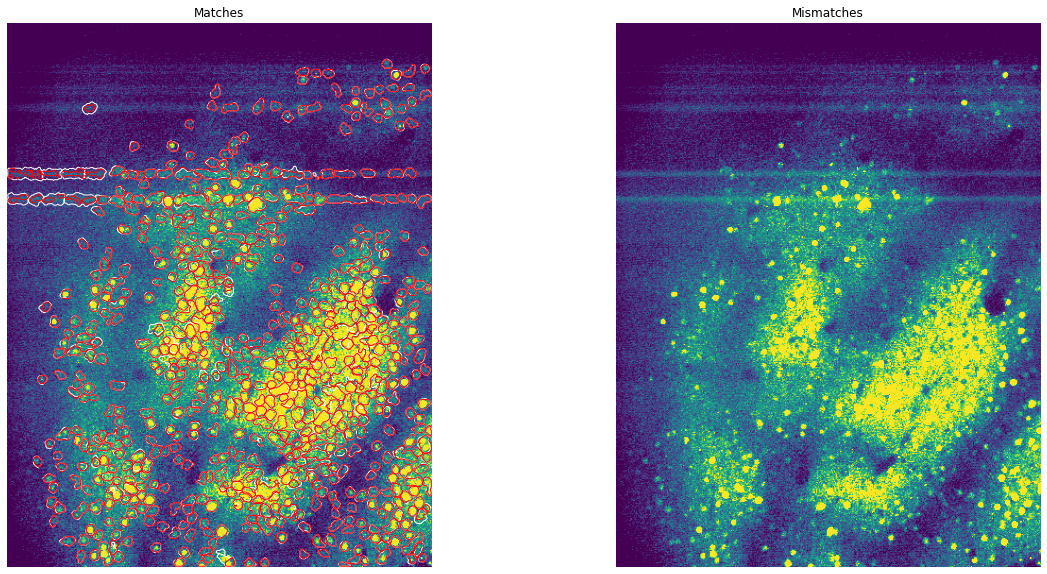

In [194]:
multisessionROIs = register_ROIs(cm1.estimates.A, cm2.estimates.A, dims, template1=template1, template2=template2, align_flag=False, D=None, max_thr=0, use_opt_flow=True, thresh_cost=0.7, max_dist=10, enclosed_thr=None, print_assignment=False, plot_results=True, Cn=None, cmap='viridis')

In [209]:
multisessionROIs[0].shape

(653,)

Use register_multisession()
The function register_multisession() requires 3 arguments:

A: A list of ndarrays or scipy.sparse.csc matrices with (# pixels X # component ROIs) for each session
dims: Dimensions of the FOV, needed to restore spatial components to a 2D image
templates: List of ndarray matrices of size dims, template image of each session

In [202]:
A= [cm1.estimates.A,cm2.estimates.A]
dims = dims
templates = [template1,template2]
spatial_union, assignments, matchings = register_multisession(A=A, dims=dims, templates=templates,align_flag=False)

# to solve: either there's a bug or the having the same template doesn't work for some reason
# maybe it's this:
# # Division-assignment operator raises error, separate division and assignment work #10565
# https://github.com/numpy/numpy/issues/10565

TypeError: No loop matching the specified signature and casting was found for ufunc true_divide